In [82]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [58]:
# read data
bts1 = pd.read_csv('../data/raw/bts/dark_wild_final.csv')
taylor1 = pd.read_csv('../data/raw/taylor/nine_final.csv')
justin1 = pd.read_csv('../data/raw/justin/believe_final.csv')

bts2 = pd.read_csv('../data/raw/bts/love_final.csv')
taylor2 = pd.read_csv('../data/raw/taylor/reputation_final.csv')
justin2 = pd.read_csv('../data/raw/justin/purpose_final.csv')

bts3 = pd.read_csv('../data/raw/bts/be_final.csv')
taylor3 = pd.read_csv('../data/raw/taylor/folklore_final.csv')
justin3 = pd.read_csv('../data/raw/justin/changes_final.csv')

In [111]:
all_albums = pd.concat([bts1.sample(40000, random_state=0), 
                        bts2.sample(40000, random_state=0), 
                        bts3.sample(40000, random_state=0), 
                        taylor1.sample(40000, random_state=0), 
                        taylor2.sample(40000, random_state=0), 
                        taylor3.sample(40000, random_state=0), 
                        justin1.sample(40000, random_state=0), 
                        justin2.sample(40000, random_state=0), 
                        justin3.sample(40000, random_state=0)], ignore_index=True)

In [125]:
def percent_tweets(df, a):
    prop = (df.username.value_counts().iloc[:int(df.username.nunique() * a)]).sum() / len(df)
    return round(prop * 100, 2)

## EDA
Albums chosen:<br>
BTSDw - (August 17 2014 - Aug 31 2014)<br>
BTSLove - (May 16 2018 - May 30 2018)<br>
BTSBe - (November 18 2020 - December 2 2020)<br>

TS1989 - (October 25 2014 - Nov 8 2014)<br>
TSRep - (Nov 8 2017 - Nov 22 2017)<br>
TSEver - (Dec 9 2020 - Dec 23 2020)<br>

JBB - (June 13 2012 - June 27 2012)<br>
JBP - (Nov 11 2015 - Nov 25 2015)<br>
JBC - (Feb 12 2020 - Feb 26 2020)<br>

We are treating a combination of all our datasets (40,000 tweets from each album, otherwise BTSBe makes up >50% of all the tweets) as a "sample" of the twitter population, specifically a sample of the Fandom population on twitter. EDA section will introduce stats of that sample as "baseline" measures, while Results section will compare stats between artists.

### Basic Stats

In [112]:
print('Number of Tweets:', len(all_albums))

Number of Tweets: 360000


In [113]:
print('Number of unique users:', all_albums.username.nunique())

Number of unique users: 183328


In [114]:
print('Average number of tweets per user', round(len(all_albums) / all_albums.username.nunique(), 2))

Average number of tweets per user 1.96


### Retweets/Likes

In [137]:
print('Average number of likes per user:', round(all_albums.groupby('username').likes_count.mean().mean(), 2))

Average number of likes per user: 13.61


Likes distribution


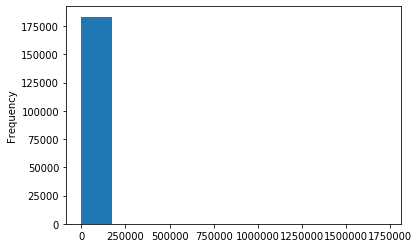

In [133]:
print('Likes distribution')
all_albums.groupby('username').likes_count.sum().plot.hist();

In [136]:
print('Average number of retweets per user:', round(all_albums.groupby('username').retweets_count.mean().mean(), 2))

Average number of retweets per user: 5.4


Retweets distribution


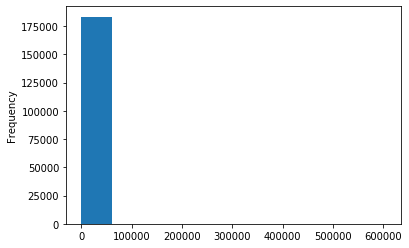

In [134]:
print('Retweets distribution')
all_albums.groupby('username').retweets_count.sum().plot.hist();

### User/Tweet stats
a% of people made b% of tweets

In [126]:
percent_tweets(all_albums, 0.03)

29.45

In [128]:
percs = []
for i in np.arange(0.01, 0.11, 0.01):
    percs.append(percent_tweets(all_albums, i))

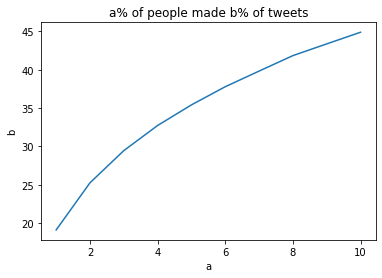

In [153]:
perc_df = pd.DataFrame().assign(a=np.arange(0.01, 0.11, 0.01)*100, b=percs)
perc_df.plot(x='a', y='b', title='a% of people made b% of tweets', ylabel='b', legend=False);

### Tweets per day

In [115]:
print('Tweets per day:', round(all_albums.normalized_dates.value_counts().mean(), 2))

Tweets per day: 24000.0


The spike on "day 12" was due to Justin Bieber's first album, which had a huge spike on day 12 (the day an additional single was released). I don't know if that's bad for our "sample" dataset... but it's what the data's giving us.

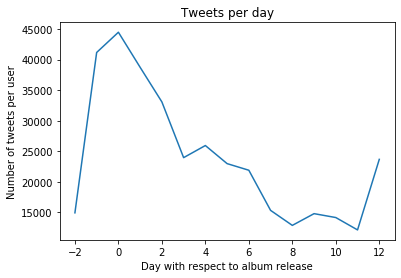

In [150]:
tweets_per_day = all_albums.normalized_dates.value_counts().sort_index()
tweets_per_day.plot(title='Tweets per day', xlabel='Day with respect to album release', ylabel='Number of tweets per user');

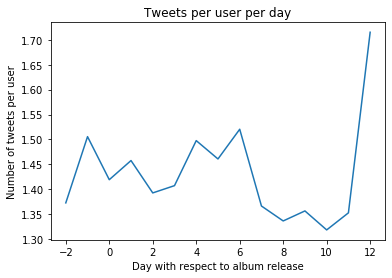

In [152]:
tweets_users_day = all_albums.groupby('normalized_dates').username.apply(lambda x: x.value_counts().mean())
tweets_users_day.plot(title='Tweets per user per day', xlabel='Day with respect to album release', ylabel='Number of tweets per user');